In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
num_records = 500

categories = ["Groceries", "Utilities", "Transportation", "Healthcare", "Entertainment", "Savings"]

income = np.random.randint(5000, 15001, size=num_records)

groceries_prop = np.random.uniform(0.3, 0.6, size=num_records)
utilities_prop = np.random.uniform(0.02, 0.06, size=num_records)
transport_prop = np.random.uniform(0.03, 0.08, size=num_records)
healthcare_prop = np.random.uniform(0.01, 0.05, size=num_records)
entertainment_prop = np.random.uniform(0.02, 0.06, size=num_records)
savings_prop = np.random.uniform(0.05, 0.15, size=num_records)

groceries = groceries_prop * income
utilities = utilities_prop * income
transport = transport_prop * income
healthcare = healthcare_prop * income
entertainment = entertainment_prop * income
savings = savings_prop * income

df = pd.DataFrame({
    "Income": income,
    "Groceries": groceries.round(2),
    "Utilities": utilities.round(2),
    "Transportation": transport.round(2),
    "Healthcare": healthcare.round(2),
    "Entertainment": entertainment.round(2),
    "Savings": savings.round(2)
})

df["Total Expenses"] = df[["Groceries", "Utilities", "Transportation", "Healthcare", "Entertainment"]].sum(axis=1)

df["Grocery Budget"] = 0.4 * df["Income"]

df["Overspending"] = df["Groceries"] > df["Grocery Budget"]

print(df.head(10))



   Income  Groceries  Utilities  Transportation  Healthcare  Entertainment  \
0   12270    6538.98     440.34          686.98      222.84         315.39   
1    5860    2357.13     273.80          274.54      188.71         325.84   
2   10390    6018.17     292.99          742.30      408.56         351.55   
3   10191    5681.73     323.32          525.29      353.01         266.78   
4   10734    4601.65     599.53          455.50      188.07         225.61   
5   11265    5917.07     231.16          685.56      272.79         516.31   
6    5466    2877.10     128.02          357.14      226.03         248.57   
7    9426    3119.41     266.90          361.51      303.23         316.94   
8   10578    6037.56     222.79          405.99      107.99         241.90   
9   13322    6015.89     363.12          424.09      538.74         484.72   

   Savings  Total Expenses  Grocery Budget  Overspending  
0  1416.76         8204.53          4908.0          True  
1   381.83         3420

In [3]:
df.head(10)

,Income,Groceries,Utilities,Transportation,Healthcare,Entertainment,Savings,Total Expenses,Grocery Budget,Overspending
0,12270,6538.98,440.34,686.98,222.84,315.39,1416.76,8204.53,4908.0,True
1,5860,2357.13,273.80,274.54,188.71,325.84,381.83,3420.02,2344.0,True
2,10390,6018.17,292.99,742.30,408.56,351.55,1429.54,7813.57,4156.0,True
3,10191,5681.73,323.32,525.29,353.01,266.78,1058.94,7150.13,4076.4,True
4,10734,4601.65,599.53,455.50,188.07,225.61,839.91,6070.36,4293.6,True
5,11265,5917.07,231.16,685.56,272.79,516.31,1042.27,7622.89,4506.0,True
6,5466,2877.10,128.02,357.14,226.03,248.57,293.84,3836.86,2186.4,True
7,9426,3119.41,266.90,361.51,303.23,316.94,591.83,4367.99,3770.4,False
8,10578,6037.56,222.79,405.99,107.99,241.90,1338.70,7016.23,4231.2,True
9,13322,6015.89,363.12,424.09,538.74,484.72,666.12,7826.56,5328.8,True


In [5]:
df.size

5000

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
plt.figure(figsize=(15, 12))


<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

C:\Users\Shubham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

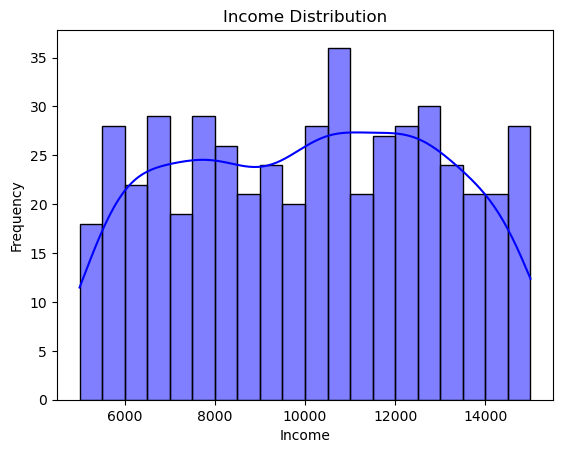

In [11]:
plt.subplot(1,1,1)
sns.histplot(df['Income'],kde=True,bins=20,color='blue')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")

C:\Users\Shubham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

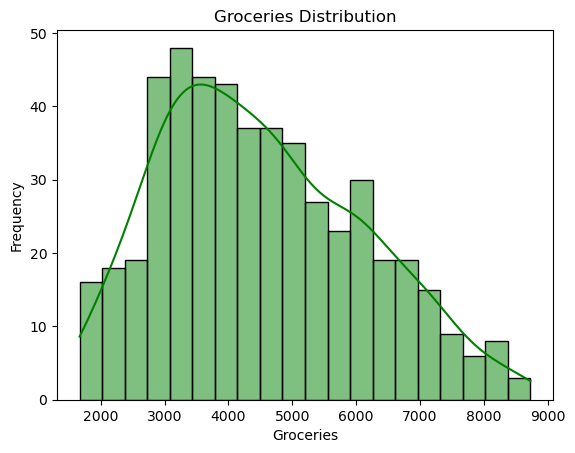

In [13]:
plt.subplot(1,1,1)
sns.histplot(df['Groceries'], kde=True, bins=20, color='green')
plt.title("Groceries Distribution")
plt.xlabel("Groceries")
plt.ylabel("Frequency")

Text(0, 0.5, 'Total Expenses (₹)')

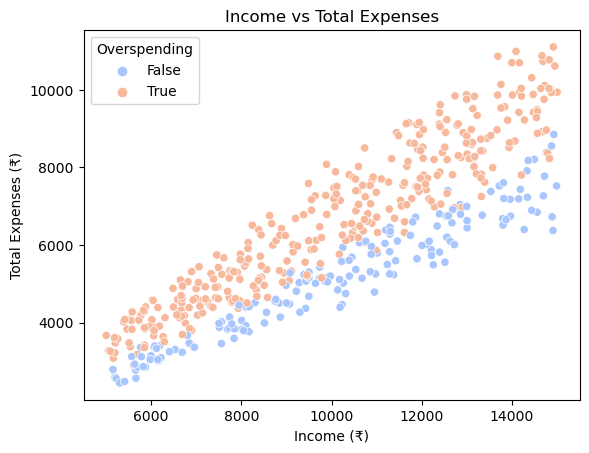

In [15]:
plt.subplot(1, 1, 1)
sns.scatterplot(x='Income', y='Total Expenses', hue='Overspending', data=df, palette='coolwarm')
plt.title("Income vs Total Expenses")
plt.xlabel("Income (₹)")
plt.ylabel("Total Expenses (₹)")


Text(0, 0.5, 'Groceries')

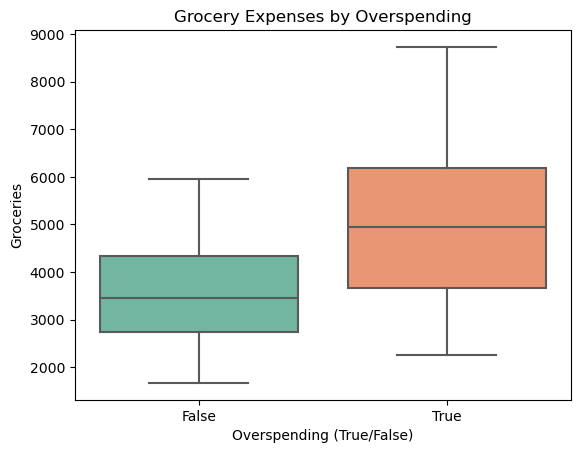

In [17]:
plt.subplot(1,1,1)
sns.boxplot(x='Overspending', y='Groceries', data=df, palette='Set2')
plt.title("Grocery Expenses by Overspending")
plt.xlabel("Overspending (True/False)")
plt.ylabel("Groceries")

Text(0.5, 1.0, 'Correlation Matrix')

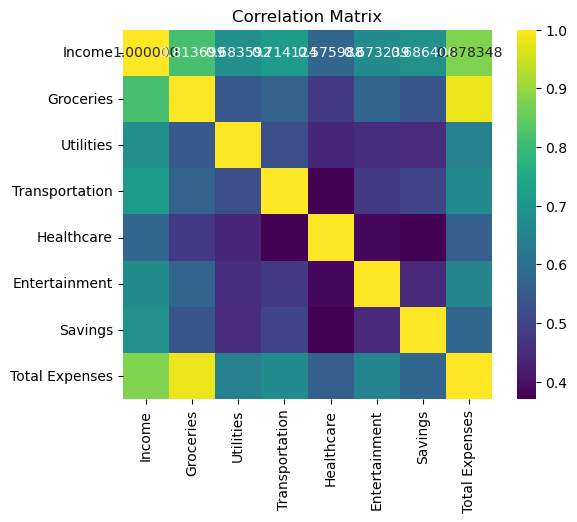

In [19]:
plt.subplot(1, 1, 1)
corr_cols = ['Income','Groceries','Utilities','Transportation','Healthcare','Entertainment','Savings','Total Expenses']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='viridis', fmt=".6f", square=True)
plt.title("Correlation Matrix")

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          500 non-null    int32  
 1   Groceries       500 non-null    float64
 2   Utilities       500 non-null    float64
 3   Transportation  500 non-null    float64
 4   Healthcare      500 non-null    float64
 5   Entertainment   500 non-null    float64
 6   Savings         500 non-null    float64
 7   Total Expenses  500 non-null    float64
 8   Grocery Budget  500 non-null    float64
 9   Overspending    500 non-null    bool   
dtypes: bool(1), float64(8), int32(1)
memory usage: 33.8 KB


In [25]:
df.describe()

,Income,Groceries,Utilities,Transportation,Healthcare,Entertainment,Savings,Total Expenses,Grocery Budget
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,10079.472000,4522.978040,406.294300,556.118440,300.85896,402.183160,1001.408460,6188.432900,4031.788800
std,2840.679867,1577.311439,168.564849,218.683587,145.59480,169.662453,410.653615,1995.721547,1136.271947
min,5004.000000,1667.590000,111.230000,160.930000,59.19000,107.570000,255.190000,2447.060000,2001.600000
25%,7732.500000,3274.677500,280.170000,382.162500,190.13250,271.840000,682.140000,4582.372500,3093.000000
50%,10234.500000,4319.805000,378.510000,516.965000,274.18000,365.300000,931.250000,6052.285000,4093.800000
75%,12429.500000,5682.597500,535.255000,706.167500,393.47250,508.957500,1259.280000,7610.750000,4971.800000
max,14998.000000,8730.520000,855.850000,1184.330000,733.63000,885.380000,2154.630000,11106.780000,5999.200000


In [27]:
df.head()

,Income,Groceries,Utilities,Transportation,Healthcare,Entertainment,Savings,Total Expenses,Grocery Budget,Overspending
0,12270,6538.98,440.34,686.98,222.84,315.39,1416.76,8204.53,4908.0,True
1,5860,2357.13,273.80,274.54,188.71,325.84,381.83,3420.02,2344.0,True
2,10390,6018.17,292.99,742.30,408.56,351.55,1429.54,7813.57,4156.0,True
3,10191,5681.73,323.32,525.29,353.01,266.78,1058.94,7150.13,4076.4,True
4,10734,4601.65,599.53,455.50,188.07,225.61,839.91,6070.36,4293.6,True


In [29]:
X = df.drop(['Overspending', 'Total Expenses', 'Grocery Budget'], axis=1)
y = df['Overspending']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [33]:
X_train.shape

(400, 7)

In [35]:
X_test.shape

(100, 7)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
pipelines = {
    'LogisticRegression': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(solver='liblinear'))]),
    'RandomForest': Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier(random_state=42))]),
    'GradientBoosting': Pipeline([('scaler', StandardScaler()), ('clf', GradientBoostingClassifier(random_state=42))]),
    'AdaBoost': Pipeline([('scaler', StandardScaler()), ('clf', AdaBoostClassifier(random_state=42))]),
    'SVC': Pipeline([('scaler', StandardScaler()), ('clf', SVC(probability=True))]),
    'DecisionTree': Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=42))])
}

In [41]:
param_grids = {
    'LogisticRegression': {'clf__C': [0.01, 0.1, 1, 10]},
    'RandomForest': {'clf__n_estimators': [50, 100], 'clf__max_depth': [3, 5, 7]},
    'GradientBoosting': {'clf__learning_rate': [0.01, 0.1], 'clf__n_estimators': [50, 100], 'clf__max_depth': [3, 5]},
    'AdaBoost': {'clf__n_estimators': [50, 100], 'clf__learning_rate': [0.01, 0.1]},
    'SVC': {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']},
    'DecisionTree': {'clf__max_depth': [3, 5, 7]}
}

In [43]:
best_model = None
best_model_name = None
best_accuracy = 0.0

In [45]:
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    cv_accuracy = grid_search.best_score_
    
    print(model_name)
    print(f"Best CV Accuracy: {cv_accuracy:.4f}")
    print("Best Hyperparameters:", grid_search.best_params_, "\n")
    
    if cv_accuracy > best_accuracy:
        best_accuracy = cv_accuracy
        best_model = grid_search.best_estimator_
        best_model_name = model_name

LogisticRegression
Best CV Accuracy: 0.9900
Best Hyperparameters: {'clf__C': 10} 

RandomForest
Best CV Accuracy: 0.9175
Best Hyperparameters: {'clf__max_depth': 7, 'clf__n_estimators': 100} 

GradientBoosting
Best CV Accuracy: 0.9375
Best Hyperparameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 50} 

AdaBoost
Best CV Accuracy: 0.9325
Best Hyperparameters: {'clf__learning_rate': 0.1, 'clf__n_estimators': 100} 

SVC
Best CV Accuracy: 0.9850
Best Hyperparameters: {'clf__C': 1, 'clf__kernel': 'linear'} 

DecisionTree
Best CV Accuracy: 0.9275
Best Hyperparameters: {'clf__max_depth': 7} 



In [47]:
print(f"Overall Best Model: {best_model_name} with CV Accuracy: {best_accuracy:.4f}\n")

Overall Best Model: LogisticRegression with CV Accuracy: 0.9900



In [49]:
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with {best_model_name}: {test_acc:.4f}\n")
print("=Classification Report=")
print(classification_report(y_test, y_pred))

Test Accuracy with LogisticRegression: 0.9900

=Classification Report=
              precision    recall  f1-score   support

       False       1.00      0.97      0.98        33
        True       0.99      1.00      0.99        67

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



In [51]:
import pickle 

In [53]:
pickle_filename = "best_model.pkl"

In [55]:
with open(pickle_filename,'wb') as file:
    pickle.dump(best_model, file)